In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CUR_DATASET = "LIAR-PLUS"

In [3]:
COLUMN_NAMES = ['id', 'label', 'statement', 'subject', 'speaker',
               'speakers_job', 'state_info', 'party_aff', 'bt_cnt',
               'f_cnt', 'ht_cnt', 'mt_cnt', 'pf_cnt', 'context',
               'justification']

In [5]:
train = pd.read_csv(f'./data/{CUR_DATASET}/train2.tsv', sep='\t', names = COLUMN_NAMES)
valid = pd.read_csv(f'./data/{CUR_DATASET}/val2.tsv', sep='\t', names = COLUMN_NAMES)
test = pd.read_csv(f'./data/{CUR_DATASET}/test2.tsv', sep='\t', names = COLUMN_NAMES)

liar_dataset = pd.concat([train, valid, test], axis = 0).reset_index(drop = True)

In [6]:
train['justification'].fillna('Empty', inplace = True)
test['justification'].fillna('Empty', inplace = True)
valid['justification'].fillna('Empty', inplace = True)

print(train.shape, test.shape, valid.shape)

(10242, 15) (1267, 15) (1284, 15)


In [7]:
train['label'].value_counts(), np.array(train['label'].value_counts()) / np.sum(train['label'].value_counts())

(half-true      2114
 false          1995
 mostly-true    1962
 true           1676
 barely-true    1654
 pants-fire      839
 Name: label, dtype: int64,
 array([0.20644531, 0.19482422, 0.19160156, 0.16367187, 0.16152344,
        0.08193359]))

In [8]:
# Nan values counts
train.isna().sum()

id                  2
label               2
statement           2
subject             4
speaker             4
speakers_job     2899
state_info       2210
party_aff           4
bt_cnt              4
f_cnt               4
ht_cnt              4
mt_cnt              4
pf_cnt              4
context           104
justification       0
dtype: int64

In [9]:
def get_top_counts(col):
    COLUMNS = [col, 'counts']
    
    data = pd.DataFrame(np.array([train[col].value_counts().index, train[col].value_counts().values]).T, columns = COLUMNS)
    
    plt.title(f'Top 10 Value Counts for \"{col}\"')
    sns.barplot(x = COLUMNS[1], y = COLUMNS[0], data = data.iloc[:10, :]);

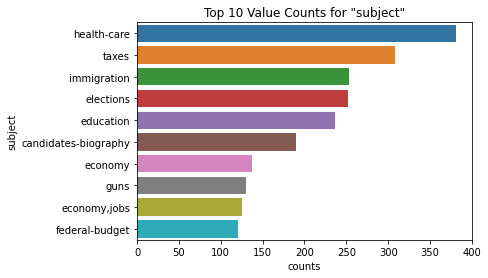

In [10]:
get_top_counts('subject')

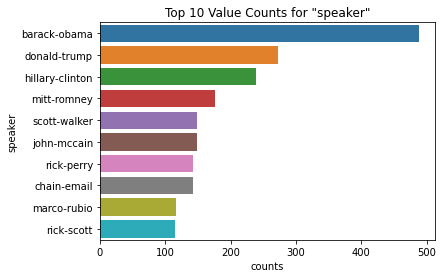

In [11]:
get_top_counts('speaker')

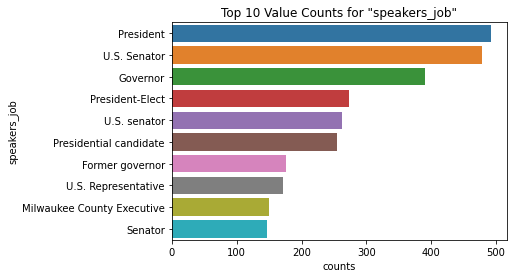

In [12]:
get_top_counts('speakers_job')

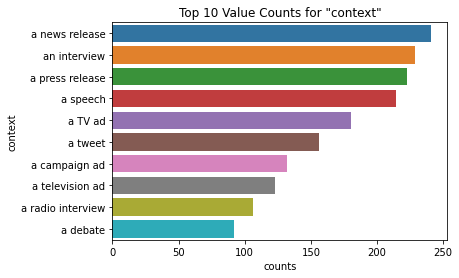

In [13]:
get_top_counts('context')

In [14]:
observation = train.sample(n = 1)
print(f"Statement: {observation['statement'].iloc[0]}")
print(f"Label: {observation['label'].iloc[0]}")
print(f'Scores: {observation.iloc[:, 8:13].iloc[0]}')
print(f"Justification: {observation['justification'].iloc[0]}")

Statement: The firefighters, the policemen and others who supported (Wisconsin Gov. Scott Walker) in his election bid ... dont have to worry about their collective bargaining rights.
Label: half-true
Scores: bt_cnt    0.0
f_cnt     1.0
ht_cnt    4.0
mt_cnt    7.0
pf_cnt    0.0
Name: 3280.0, dtype: float64
Justification: Biden said "Nationwide, tuition at public universities is up almost 300 percent . . . in the last 20 years. "The College Boards data shows that between 1991-92 and 2011-12, it increased by about 291 percent for public four-year universities in current dollars -- one valid way of measuring tuition hikes. Adjusted for inflation, however, tuition hasnt gone up quite that fast -- its up 136 percent.


In [15]:
from wordcloud import WordCloud, STOPWORDS
import pickle
from tqdm import tqdm

In [16]:
stopwords = set(STOPWORDS)
 
# Source: https://www.kaggle.com/gpreda/jigsaw-eda

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

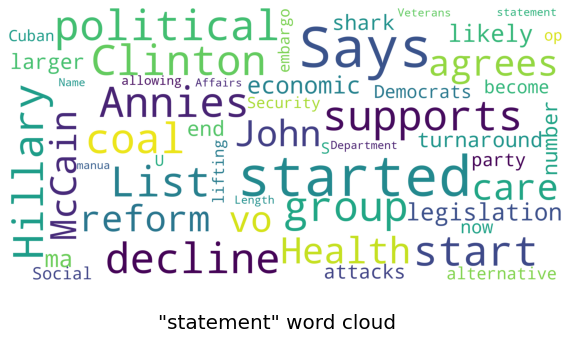

In [18]:
col = 'statement'
show_wordcloud(train[col], f'\"{col}\" word cloud')

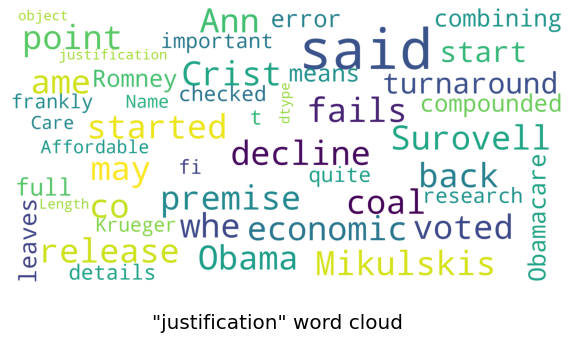

In [19]:
col = 'justification'
show_wordcloud(train[col], f'\"{col}\" word cloud')

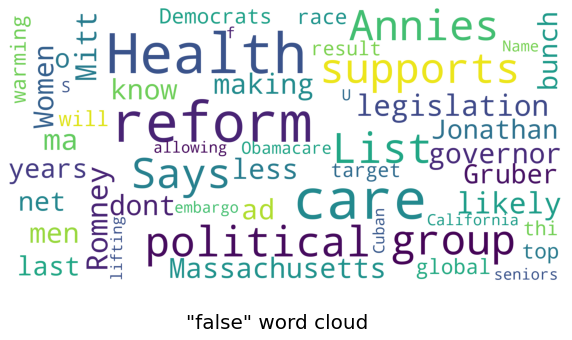

In [21]:
col = "false"
show_wordcloud(train[train['label'] == col]['statement'], f'\"{col}\" word cloud')